In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns 

## Data Preparation

In [2]:
# importing the Iris dataset with pandas
dataset = pd.read_csv('googleps_cleaned.csv')

In [3]:
print(dataset.head())
print(type(dataset))

   Category          Rating   Reviews  Size  Installs  Type  Price  \
0         0     High Rating     159.0  19.0         9     0    0.0   
1         0  Average Rating     967.0  14.0        12     0    0.0   
2         0     High Rating   87510.0   8.7        14     0    0.0   
3         0     High Rating  215644.0  25.0        16     0    0.0   
4         0     High Rating     967.0   2.8        11     0    0.0   

   Content Rating  Genres  
0               1       9  
1               1      11  
2               1       9  
3               4       9  
4               1      10  
<class 'pandas.core.frame.DataFrame'>


In [4]:
ds1_4 = dataset.iloc[:, [0,1,2,3,4,5,6,7,8]]
print (ds1_4.head())

   Category          Rating   Reviews  Size  Installs  Type  Price  \
0         0     High Rating     159.0  19.0         9     0    0.0   
1         0  Average Rating     967.0  14.0        12     0    0.0   
2         0     High Rating   87510.0   8.7        14     0    0.0   
3         0     High Rating  215644.0  25.0        16     0    0.0   
4         0     High Rating     967.0   2.8        11     0    0.0   

   Content Rating  Genres  
0               1       9  
1               1      11  
2               1       9  
3               4       9  
4               1      10  


### Feature Selection using Scatter Map and Correlation

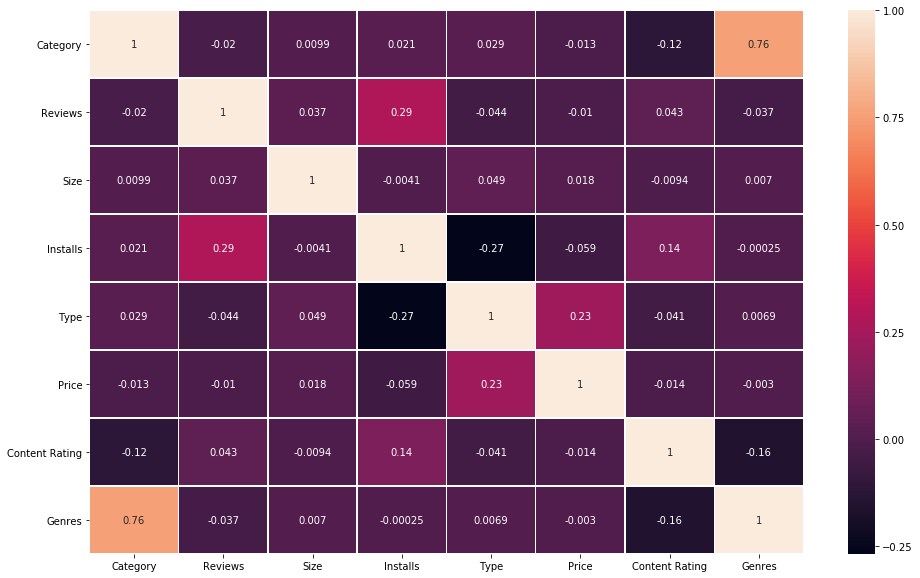

In [5]:
import seaborn as sns
plt.figure(figsize=(16, 10))
sns.heatmap(dataset.corr(), annot=True,linewidths=.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F85E687D30>,
      dtype=object)

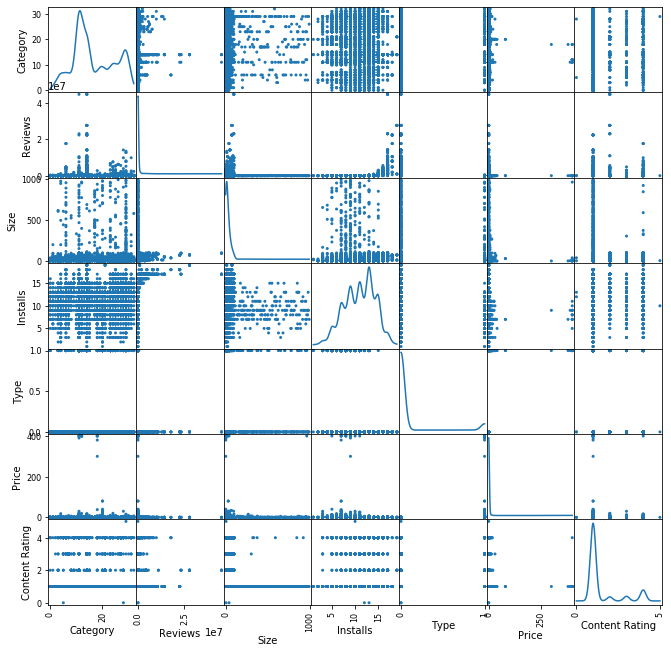

In [6]:
from pandas.plotting import scatter_matrix

scatter_matrix(dataset.iloc[:,0:8], alpha=1, figsize=(11, 11), diagonal='kde')

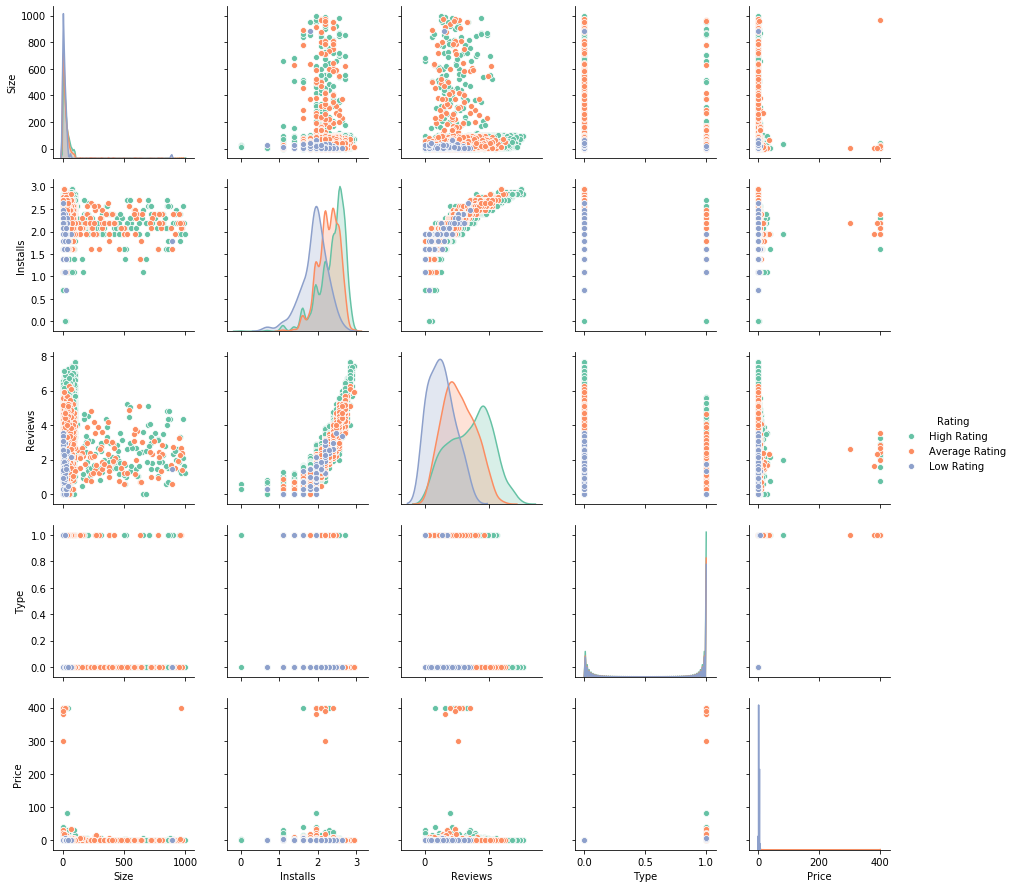

In [7]:
x = dataset['Rating'].dropna()
y = dataset['Size'].dropna()
z = dataset['Installs'][dataset.Installs!=0].dropna()
p = dataset['Reviews'][dataset.Reviews!=0].dropna()
t = dataset['Type']
price = dataset['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t,price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Rating', palette="Set2")

According to the heap map and scatter map, we can see that 'Genres' and 'Categoty' are high positive correlation, we are going remove one of them.

We are going to ignore some features that don't contribute much to the model.

Selected features are Reviews and installs, Type and price, Content Rating and installs

In [8]:
dataset=dataset.iloc[:,[0,1,2,3,4,5,6,7]]

In [9]:
x = dataset.iloc[:, [0,2,3,4,5,6,7]].values
print(type(x))
x

<class 'numpy.ndarray'>


array([[0.00000e+00, 1.59000e+02, 1.90000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [0.00000e+00, 9.67000e+02, 1.40000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [0.00000e+00, 8.75100e+04, 8.70000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [1.10000e+01, 3.80000e+01, 5.30000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.10000e+01, 4.00000e+00, 3.60000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.80000e+01, 3.98307e+05, 1.90000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00]])

## Elbow Method - Finding Optimum Number of Cluster for k-Means Classifications

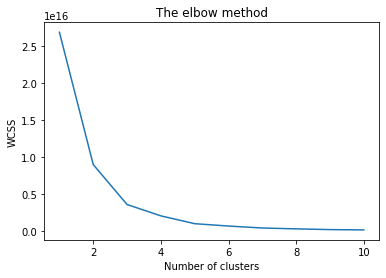

In [10]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

# Trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

## Training k-Means with 3 clusters

Using the elbow method, we decided that the optimal number of cluster is 3. Let's look at how the data looks like with 3 clusters. 

In [11]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans_3 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans_3.fit(x)
y_kmeans = kmeans_3.fit_predict(x)

### Select 'Reviews' and 'Installs' to figure out the clustering

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating'],
      dtype='object')


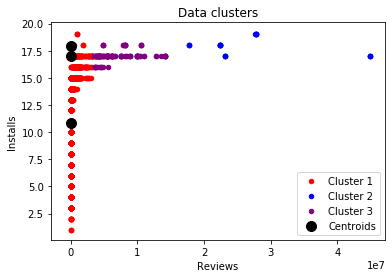

In [13]:
#Visualising the clusters by selecting only column 1 and 3
plt.scatter(x[y_kmeans == 0, 1], x[y_kmeans == 0, 3], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 1], x[y_kmeans == 1, 3], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 1], x[y_kmeans == 2, 3], s = 20, c = 'purple', label = 'Cluster 3')
#plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 3], s = 10, c = 'green', label = 'Cluster 4')
#plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 3], s = 10, c = 'orange', label = 'Cluster 5')

#Plotting the centroids of the clusters
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:,3], s = 100, c = 'black', label = 'Centroids')
print (dataset.columns)
plt.title('Data clusters')
plt.xlabel(dataset.columns[2])
plt.ylabel(dataset.columns[4])

plt.legend()
plt.show()

Based on the obtained scatter map , the provided features are an efficient way to predict three clusters. From our assumptions for dividing ratings to 3 category was a correct decision as we got 3 clusters based on the results above.
We continue with PCA and compare the results with clustering.

### Using PCA--Dimensionality Reduction

For many algorithms, feature scaling will affect the model performance. In general scaling improves performance. Standard Scaler scale the value based on the variance in the data. 

*Important Note: we should scale the test data based on the same scale that we use on the train data. So we use fit_transform on training data, but we normally use transform() on the test data*

In [87]:
from sklearn.preprocessing import StandardScaler
features = ['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating']

x = dataset.loc[:, features].values
y = dataset.loc[:,['Rating']].values
x = StandardScaler().fit_transform(x)

pd.DataFrame(data=x, columns = features).head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,-2.03631,-0.158138,-0.195722,-0.622513,-0.284156,-0.064812,-0.469001
1,-2.03631,-0.157704,-0.249177,0.311196,-0.284156,-0.064812,-0.469001
2,-2.03631,-0.111271,-0.305840,0.933669,-0.284156,-0.064812,-0.469001
3,-2.03631,-0.042523,-0.131576,1.556141,-0.284156,-0.064812,2.499928
4,-2.03631,-0.157704,-0.368917,-0.000040,-0.284156,-0.064812,-0.469001


In [88]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-0.239418,0.040740
1,0.332519,0.193439
2,0.733817,0.309212
3,1.920289,1.574274
4,0.147913,0.104125


In [89]:
finalDf = pd.concat([principalDf, dataset[['Rating']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Rating
0,-0.239418,0.040740,High Rating
1,0.332519,0.193439,Average Rating
2,0.733817,0.309212,High Rating
3,1.920289,1.574274,High Rating
4,0.147913,0.104125,High Rating


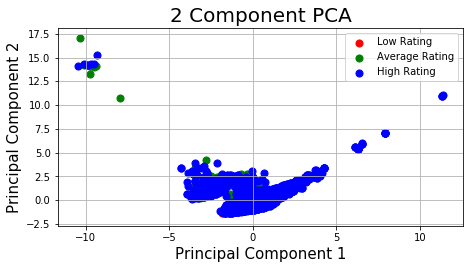

In [90]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(2,2,4) 
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)


targets = ['Low Rating', 'Average Rating', 'High Rating']
colors = 'rgb'
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Rating'] == target
    ax1.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.legend(targets)
ax1.grid()

According to scatter map, seems that PCA have a low impact to identify clusters

### Select 'Type' and 'Price' to figure out the clustering

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')


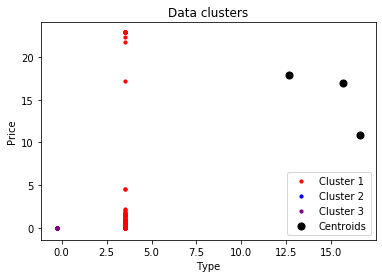

In [91]:
plt.scatter(x[y_kmeans == 0, 4], x[y_kmeans == 0, 5], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 4], x[y_kmeans == 1, 5], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 4], x[y_kmeans == 2, 5], s = 10, c = 'purple', label = 'Cluster 3')

plt.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:,3], s = 50, c = 'black', label = 'Centroids')
print (dataset.columns)
plt.title('Data clusters')
plt.xlabel(dataset.columns[5])
plt.ylabel(dataset.columns[6])

plt.legend()
plt.show()

Based on the scatter map, seems that the combination of these two features does not contributes to clustering

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')


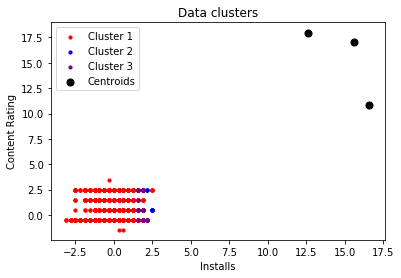

In [92]:
plt.scatter(x[y_kmeans == 0, 3], x[y_kmeans == 0, 6], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 3], x[y_kmeans == 1, 6], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 3], x[y_kmeans == 2, 6], s = 10, c = 'purple', label = 'Cluster 3')

plt.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:,3], s = 50, c = 'black', label = 'Centroids')
print (dataset.columns)
plt.title('Data clusters')
plt.xlabel(dataset.columns[4])
plt.ylabel(dataset.columns[7])

plt.legend()
plt.show()

Based on the scatter map, seems that the combination of these two features are little better than the last one.
Using the K-means, we can see that 'installs' and 'Reviews' are doing a good job for clustering.

### Conclusion:
    using rating as target, we can get three clusters.
    After feature selection and reduction, using K-Means, we can get three clusters clearly